# Курс "Введение в Data Science и машинное обучение"

## Задачи третьего модуля "Случайный лес"

https://stepik.org/lesson/209695/step/1?unit=183199

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from IPython.display import Image

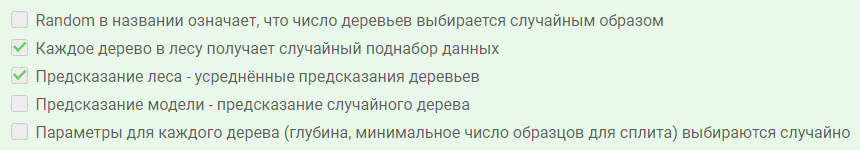

In [2]:
Image('.\Screens\Ans_3_2_1.png')

[help](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier) по random forest

https://stepik.org/lesson/209695/step/8?unit=183199

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [ ]:
rf = RandomForestClassifier(n_estimators=15, max_depth=5)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

https://stepik.org/lesson/209695/step/13?unit=183199

Воспользуемся [данными о сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте
```
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
```

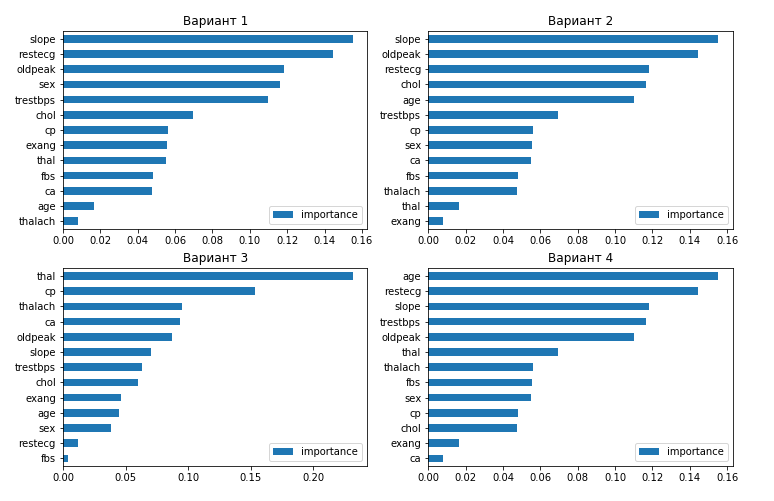

In [9]:
Image('.\Screens\Question_3_2_2.png')

Код для отрисовки важности фичей
```
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
```

In [10]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [11]:
# считаем данные

df = pd.read_csv('.\datasets\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
# зададим датасеты X и y

X = df.drop('target', axis=1)
y = df.target

In [13]:
# попробуем обучить rf без разбиения на тренировочную и тестовую выборки
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

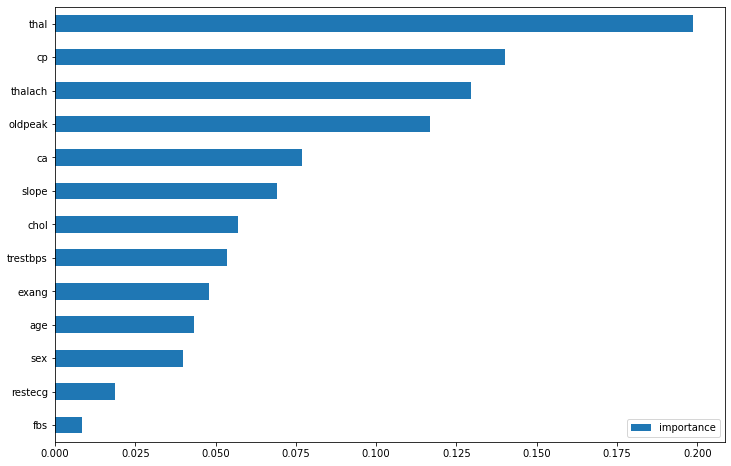

In [14]:
# визуализация

imp = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

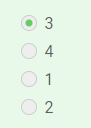

In [15]:
Image('.\Screens\Ans_3_2_2.png')

[Данные](https://stepik.org/media/attachments/course/4852/training_mush.csv) о съедобности грибов для части заданий. Взяты [отсюда](https://www.kaggle.com/uciml/mushroom-classification#mushrooms.csv), все категориальные переменные были закодированы числами для простоты.

https://stepik.org/lesson/209697/step/3?unit=183201

Переберите параметры с помощью GridSearchCV и обучите Random Forest на данных, указанных в предыдущем стэпе. Передайте в GridSearchCV модель с указанием random_state

`RandomForestClassifier(random_state=0)`

Параметры для выбора -
* n_estimators: от 10 до 50 с шагом 10
* max_depth: от 1 до 12 с шагом 2
* min_samples_leaf: от 1 до 7
* min_samples_split: от 2 до 9 с шагом 2

Укажите cv=3. Для ускорения расчётов в GridSearchCV можно указать n_jobs=-1, чтобы использовать все процессоры.

Какие параметры Random Forest были отобраны как наилучшие для решения на этих данных?

In [16]:
# считаем данные

df = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [17]:
# зададим вектора X и y

X = df.drop('class', axis=1)
y = df['class']

In [18]:
# обучим random forest
clf_rf = RandomForestClassifier(random_state=0)
parametrs = {'n_estimators': [10,20,30,40,50], 
             'max_depth': [1,3,4,7,9,11],
             'min_samples_leaf': [1,2,3,4,5,6,7],
             'min_samples_split': [2,4,6,8]}

grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 4, 7, 9, 11],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [19]:
# получим лучшие параметры модели

grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

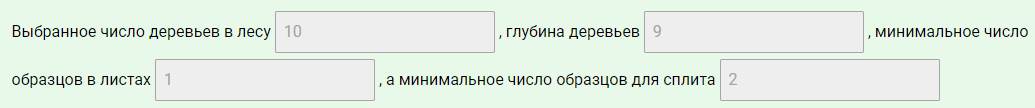

In [20]:
Image('.\Screens\Ans_3_5_1.png')

https://stepik.org/lesson/209697/step/4?unit=183201

Выберите правильные утверждения о важности фичей для нашего классификатора

In [21]:
# сохраним лучший estimator

best_estimator = grid_search_cv_clf.best_estimator_
best_estimator.fit(X, y)

RandomForestClassifier(max_depth=9, n_estimators=10, random_state=0)

In [22]:
# значения параметров

best_estimator.feature_importances_

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

In [23]:
# вывод параметров в порядке убывания важности

imp = pd.DataFrame(best_estimator.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance', ascending=False)

,importance
odor,0.188376
gill-color,0.103861
stalk-root,0.103793
spore-print-color,0.083564
gill-spacing,0.080840
ring-type,0.070726
bruises,0.070109
gill-size,0.068461
stalk-surface-below-ring,0.048296
population,0.043783


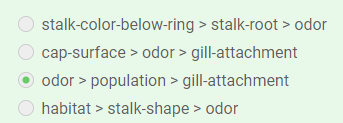

In [24]:
Image('.\Screens\Ans_3_5_2.png')

https://stepik.org/lesson/209697/step/5?unit=183201

Теперь у нас есть классификатор, определяющий какие грибы съедобные, а какие нет, испробуем его! Предскажите съедобность этих ~~данных~~ [грибов](https://stepik.org/media/attachments/course/4852/testing_mush.csv) и напишите в ответ число несъедобных грибов (класс равен 1).

Заметьте, что для использования этого леса на новых грибах, нам нужно будет заполнить значения параметров гриба, часть из которых определить проще (например, цвет шляпки), а для определения части понадобится специалист-миколог.
То есть в этом случае нам придётся самим экстрагировать признаки из объекта. Для зрительных признаков типа формы, цвета можно использовать более сложную модель (например, свёрточную нейронную сеть) и подавать на вход фотки гриба. И модель сама извлечёт признаки вместо того, чтобы нам описывать самим. Но одной фоткой тут не отделаешься - для определения запаха понадобится ещё детектор

In [38]:
X_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')
predictions = best_estimator.predict(X_test)
sum(predictions)

976

https://stepik.org/lesson/209697/step/6?unit=183201
    
Создайте confusion matrix по предсказаниям, полученным вами в прошлом уроке и [правильным ответам](https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip), (воспользуйтесь паролем из предыдущего задания, чтобы открыть их). Выберите из предложенных вариантов правильный

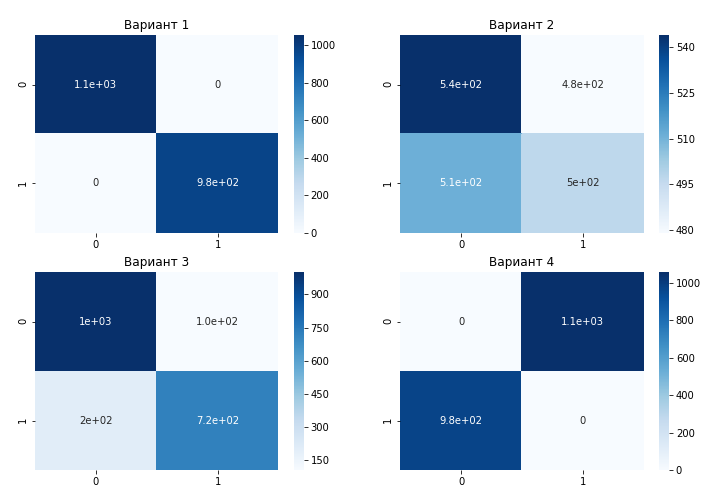

In [26]:
Image('.\Screens\Question_3_5_5.png')

In [41]:
# считываем файл с правильными ответами о съедобности грибов

import requests, zipfile, io
from zipfile import ZipFile

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
z = ZipFile(io.BytesIO(requests.get(url).content))
txtfiles = z.namelist()
y_true = pd.read_csv(z.open(txtfiles[0], "r", pwd='Cool!Move_forward!'.encode('cp850', 'replace')))

In [44]:
# получаем confusion matrix

confusion_matrix = confusion_matrix(y_true, predictions)
confusion_matrix

array([[1055,    0],
       [   0,  976]], dtype=int64)

<AxesSubplot:>

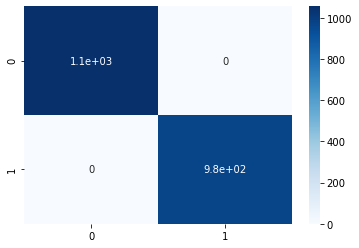

In [45]:
# визуализируем

sns.heatmap(confusion_matrix, annot=True, cmap="Blues")

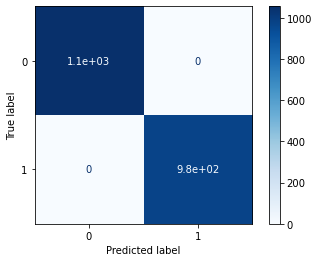

In [50]:
# альтернативный вариант визуализации

plot_confusion_matrix(best_estimator, X_test, y_true, cmap=plt.cm.Blues, values_format='.2g')

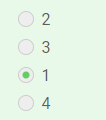

In [51]:
Image('.\Screens\Ans_3_5_4.png')